<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.718990,66.542591,43.816209,-59.450397,150.627394,181.005669,-30.378275
1,0.0,1.0,87.031548,84.849537,74.127118,45.704203,301.712407,237.915337,63.797070
2,0.0,2.0,33.293674,61.127192,33.005996,-28.404707,109.022155,115.161699,-6.139544
3,0.0,3.0,77.339573,76.753476,54.111186,35.992342,254.196579,191.488174,62.708404
4,0.0,4.0,79.648737,30.485313,41.026757,-4.961411,156.199396,165.242356,-9.042960
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.519862,31.769466,45.614017,0.628006,187.531351,172.458873,15.072479
29996,999.0,26.0,96.002755,60.042045,51.201956,-68.299110,148.947646,196.291594,-47.343949
29997,999.0,27.0,25.699232,74.382913,93.945660,5.472790,209.500595,190.740563,18.760032
29998,999.0,28.0,54.984191,95.107345,69.658271,90.504533,320.254340,207.562620,112.691720


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.718990,66.542591,43.816209,-59.450397,150.627394,181.005669,-30.378275
1,0.0,1.0,87.031548,84.849537,74.127118,45.704203,301.712407,237.915337,63.797070
2,0.0,2.0,33.293674,61.127192,33.005996,-28.404707,109.022155,115.161699,-6.139544
3,0.0,3.0,77.339573,76.753476,54.111186,35.992342,254.196579,191.488174,62.708404
4,0.0,4.0,79.648737,30.485313,41.026757,-4.961411,156.199396,165.242356,-9.042960
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.519862,31.769466,45.614017,0.628006,187.531351,172.458873,15.072479
29996,999.0,26.0,96.002755,60.042045,51.201956,-68.299110,148.947646,196.291594,-47.343949
29997,999.0,27.0,25.699232,74.382913,93.945660,5.472790,209.500595,190.740563,18.760032
29998,999.0,28.0,54.984191,95.107345,69.658271,90.504533,320.254340,207.562620,112.691720


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.718990  66.542591  43.816209 -59.450397  150.627394   
      1.0    87.031548  84.849537  74.127118  45.704203  301.712407   
      2.0    33.293674  61.127192  33.005996 -28.404707  109.022155   
      3.0    77.339573  76.753476  54.111186  35.992342  254.196579   
      4.0    79.648737  30.485313  41.026757  -4.961411  156.199396   
...                ...        ...        ...        ...         ...   
999.0 25.0   99.519862  31.769466  45.614017   0.628006  187.531351   
      26.0   96.002755  60.042045  51.201956 -68.299110  148.947646   
      27.0   25.699232  74.382913  93.945660   5.472790  209.500595   
      28.0   54.984191  95.107345  69.658271  90.504533  320.254340   
      29.0   24.509143  45.072354  35.801263 -45.304316   70.078444   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.005669  -30.378275  
      1.0    237.915337   63.797070  
      2.0    115.161699   -6.139544  
      3.0    191.488174   62.708404  
      4.0    165.242356   -9.042960  
...                 ...         ...  
999.0 25.0   172.458873   15.072479  
      26.0   196.291594  -47.343949  
      27.0   190.740563   18.760032  
      28.0   207.562620  112.691720  
      29.0   115.088786  -45.010341  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.718990  66.542591  43.816209 -59.450397  150.627394   
      1.0    87.031548  84.849537  74.127118  45.704203  301.712407   
      2.0    33.293674  61.127192  33.005996 -28.404707  109.022155   
      3.0    77.339573  76.753476  54.111186  35.992342  254.196579   
      4.0    79.648737  30.485313  41.026757  -4.961411  156.199396   
...                ...        ...        ...        ...         ...   
999.0 25.0   99.519862  31.769466  45.614017   0.628006  187.531351   
      26.0   96.002755  60.042045  51.201956 -68.299110  148.947646   
      27.0   25.699232  74.382913  93.945660   5.472790  209.500595   
      28.0   54.984191  95.107345  69.658271  90.504533  320.254340   
      29.0   24.509143  45.072354  35.801263 -45.304316   70.078444   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.005669  -30.378275  
      1.0    237.915337   63.797070  
      2.0    115.161699   -6.139544  
      3.0    191.488174   62.708404  
      4.0    165.242356   -9.042960  
...                 ...         ...  
999.0 25.0   172.458873   15.072479  
      26.0   196.291594  -47.343949  
      27.0   190.740563   18.760032  
      28.0   207.562620  112.691720  
      29.0   115.088786  -45.010341  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.718990,66.542591,43.816209,-59.450397,150.627394,181.005669,-30.378275
1,0.0,1.0,87.031548,84.849537,74.127118,45.704203,301.712407,237.915337,63.797070
2,0.0,2.0,33.293674,61.127192,33.005996,-28.404707,109.022155,115.161699,-6.139544
3,0.0,3.0,77.339573,76.753476,54.111186,35.992342,254.196579,191.488174,62.708404
4,0.0,4.0,79.648737,30.485313,41.026757,-4.961411,156.199396,165.242356,-9.042960
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.519862,31.769466,45.614017,0.628006,187.531351,172.458873,15.072479
29996,999.0,26.0,96.002755,60.042045,51.201956,-68.299110,148.947646,196.291594,-47.343949
29997,999.0,27.0,25.699232,74.382913,93.945660,5.472790,209.500595,190.740563,18.760032
29998,999.0,28.0,54.984191,95.107345,69.658271,90.504533,320.254340,207.562620,112.691720


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    89.718990  66.542591  43.816209 -59.450397  150.627394   
      1.0    87.031548  84.849537  74.127118  45.704203  301.712407   
      2.0    33.293674  61.127192  33.005996 -28.404707  109.022155   
      3.0    77.339573  76.753476  54.111186  35.992342  254.196579   
      4.0    79.648737  30.485313  41.026757  -4.961411  156.199396   
...                ...        ...        ...        ...         ...   
999.0 25.0   99.519862  31.769466  45.614017   0.628006  187.531351   
      26.0   96.002755  60.042045  51.201956 -68.299110  148.947646   
      27.0   25.699232  74.382913  93.945660   5.472790  209.500595   
      28.0   54.984191  95.107345  69.658271  90.504533  320.254340   
      29.0   24.509143  45.072354  35.801263 -45.304316   70.078444   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    181.005669  -30.378275  
      1.0    237.915337   63.797070  
      2.0    115.161699   -6.139544  
      3.0    191.488174   62.708404  
      4.0    165.242356   -9.042960  
...                 ...         ...  
999.0 25.0   172.458873   15.072479  
      26.0   196.291594  -47.343949  
      27.0   190.740563   18.760032  
      28.0   207.562620  112.691720  
      29.0   115.088786  -45.010341  

[30000 rows x 7 columns]

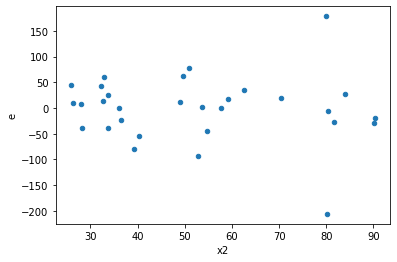

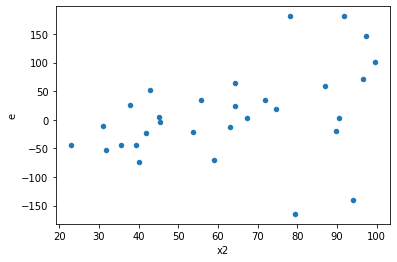

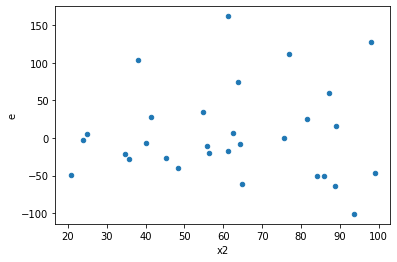

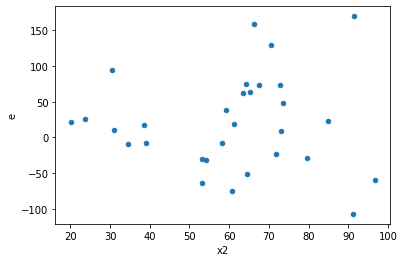

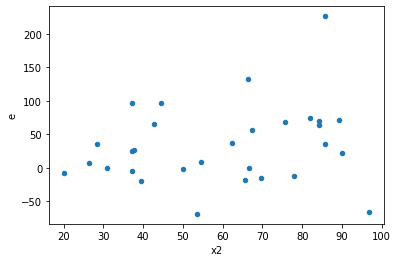

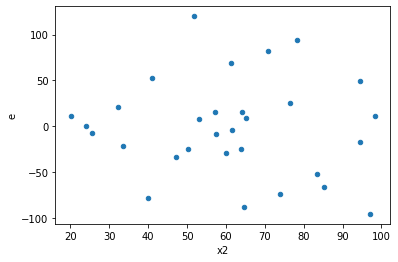

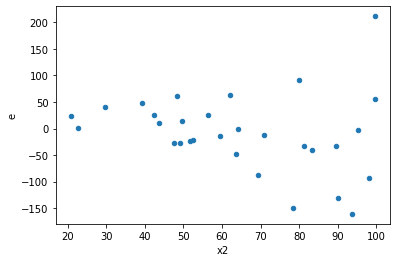

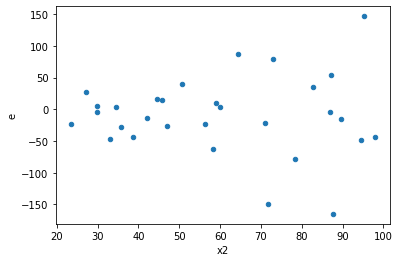

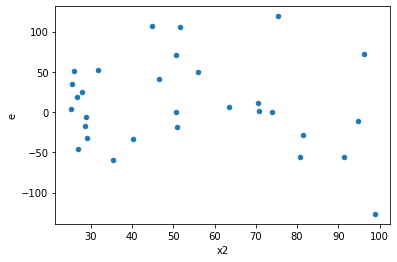

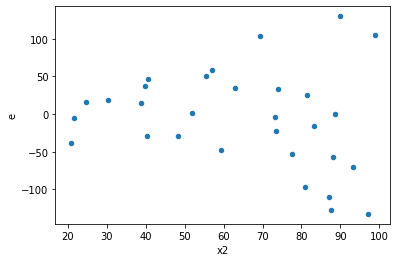

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,32085.459704836474,62480.076058168335,3565.051078315164,6942.230673129815,1.947301881691608,0.3351402720035246,0.8324298639982377,0.1675701360017623,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,12562.781025920362,51824.887430727664,1395.8645584355957,5758.320825636407,4.125271890340135,0.046381250322856005,0.976809374838572,0.023190625161428002,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,8234.144401584319,53551.2451560294,914.9049335093688,5950.138350669933,6.503559148868665,0.010205541264737938,0.994897229367631,0.005102770632368969,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,43501.95841452057,54517.29549241142,4833.55093494673,6057.477276934602,1.2532147397348903,0.7421760880627821,0.6289119559686089,0.37108804403139106,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,26393.39530006624,64096.67511671441,2932.599477785138,7121.852790746046,2.4285119208044272,0.20238724365466898,0.8988063781726655,0.10119362182733449,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,15470.593740165878,46979.41419269485,1718.9548600184307,5219.934910299427,3.0366910916110146,0.11348189390884778,0.9432590530455761,0.05674094695442389,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,13208.705966899732,62493.476656545354,1467.6339963221924,6943.7196285050395,4.73123384025282,0.030034707841030794,0.9849826460794846,0.015017353920515397,Reject005=0 : Heteroscedasticity
9.0,9.0,9.0,17445.651179936325,31150.794427175933,1938.4056866595918,3461.199380797326,1.7855908103333766,0.4007941997831199,0.79960290010844,0.20039709989155996,Reject005=1 : Homoscedasticity
11.0,9.0,9.0,12263.72262732668,124492.55662986853,1362.6358474807423,13832.506292207614,10.1512860664728,0.0019663830235874258,0.9990168084882063,0.0009831915117937129,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,32085.459704836474,62480.076058168335,3565.051078315164,6942.230673129815,1.947301881691608,0.3351402720035246,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,12562.781025920362,51824.887430727664,1395.8645584355957,5758.320825636407,4.125271890340135,0.046381250322856005,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,41754.16591538239,12441.75349595051,4639.351768375822,1382.4170551056122,0.29797633896374687,0.08579779808527456,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,8234.144401584319,53551.2451560294,914.9049335093688,5950.138350669933,6.503559148868665,0.010205541264737938,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,43501.95841452057,54517.29549241142,4833.55093494673,6057.477276934602,1.2532147397348903,0.7421760880627821,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,21487.33694430806,19222.814138591722,2387.4818827008953,2135.8682376213023,0.8946112860990807,0.8709585942448314,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,26393.39530006624,64096.67511671441,2932.599477785138,7121.852790746046,2.4285119208044272,0.20238724365466898,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,15470.593740165878,46979.41419269485,1718.9548600184307,5219.934910299427,3.0366910916110146,0.11348189390884778,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,13208.705966899732,62493.476656545354,1467.6339963221924,6943.7196285050395,4.73123384025282,0.030034707841030794,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      737
Reject005=0 : Heteroscedasticity    263
Name: Result_test, dtype: int64